In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest, norm,probplot
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.optimize import minimize

In [2]:
tickers = ["AAPL", "AMZN", "GOOG", "INTC", "ORCL", "XOM", "CVX", "COP", "HES", "OXY"]
start_date = "2012-01-01"
end_date = "2021-12-31"

In [3]:
# Download the stock data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data.to_csv('stock_data.csv')

[*********************100%%**********************]  10 of 10 completed


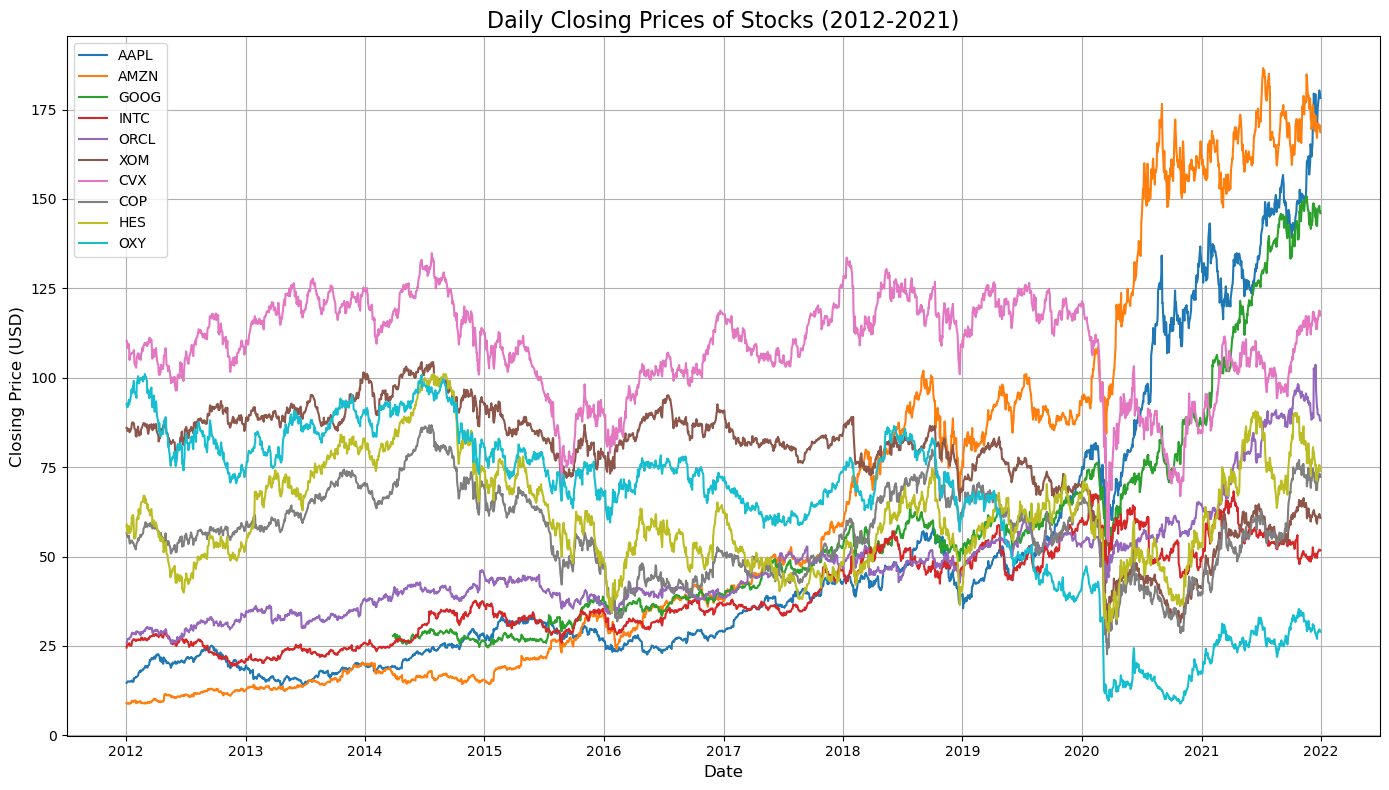

In [4]:
# Plot the closing prices of all stocks
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Daily Closing Prices of Stocks (2012-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

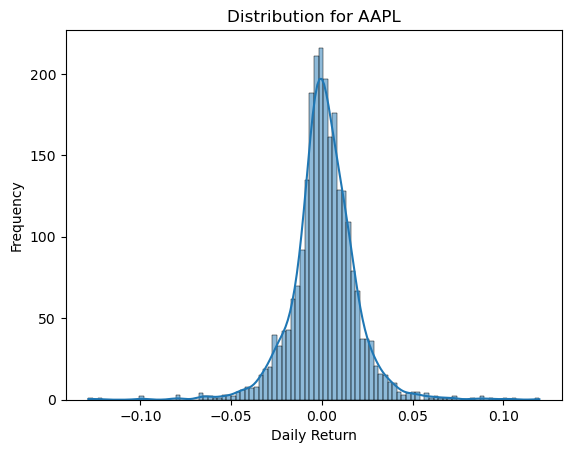

In [5]:
aapl_returns = data['AAPL'].pct_change().dropna()
sns.histplot(aapl_returns, kde=True)
plt.title('Distribution for AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Perform the Kolmogorov-Smirnov Test, we don't use Shapiro-Wilk since it is more appropriate for small sample sizes that less than 50.
standardized_returns = (aapl_returns - aapl_returns.mean()) / aapl_returns.std()
ks_statistic, p_value = kstest(standardized_returns, 'norm')
print(f"Kolmogorov-Smirnov statistic: {ks_statistic}")
print(f"p-value: {p_value}")

Kolmogorov-Smirnov statistic: 0.08015972496969151
p-value: 1.6680796344114206e-14


In [7]:
# the p-value is less 0.5 Reject the null hypothesis: The returns do not follow a normal distribution.

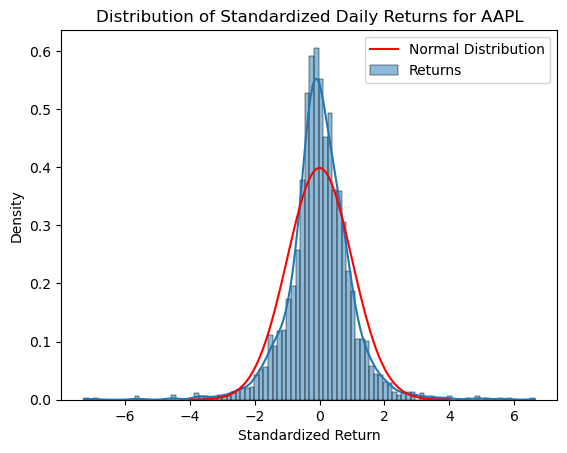

In [8]:
sns.histplot(standardized_returns, kde=True, stat="density", label="Returns")
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), label="Normal Distribution", color="red")
plt.legend()
plt.title('Distribution of Standardized Daily Returns for AAPL')
plt.xlabel('Standardized Return')
plt.ylabel('Density')
plt.show()

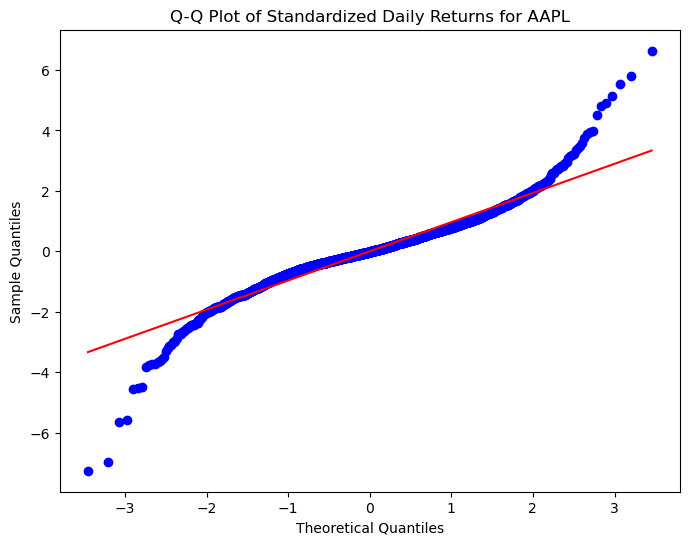

In [9]:
# Create a Q-Q plot
plt.figure(figsize=(8, 6))
probplot(standardized_returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Daily Returns for AAPL')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

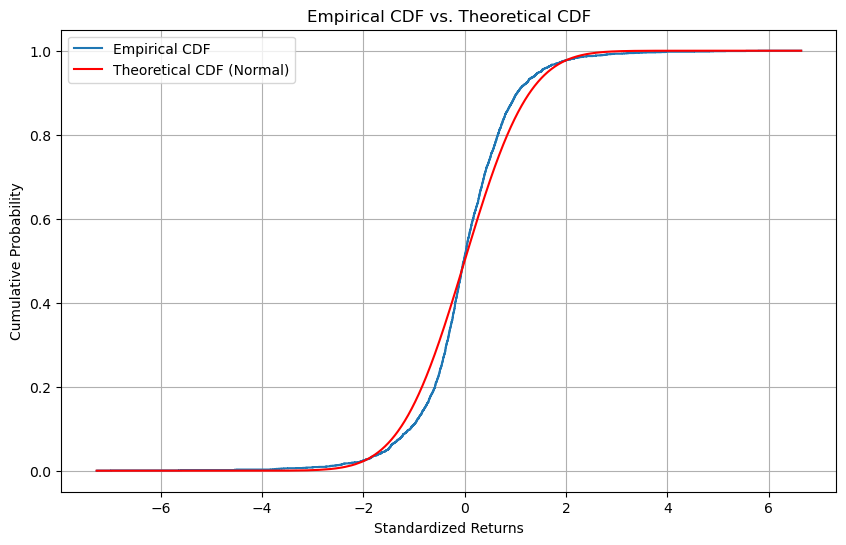

In [10]:
# Plot empirical CDF vs. theoretical CDF
plt.figure(figsize=(10, 6))
ecdf = np.sort(standardized_returns)
cdf = np.linspace(0, 1, len(ecdf))

plt.step(ecdf, cdf, label='Empirical CDF')
plt.plot(ecdf, norm.cdf(ecdf), label='Theoretical CDF (Normal)', color='red')
plt.title('Empirical CDF vs. Theoretical CDF')
plt.xlabel('Standardized Returns')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
aapl_prices = data['AAPL'].dropna()
X = sm.add_constant(aapl_prices.shift(1).dropna())
y = aapl_prices[1:]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.685e+06
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        03:12:20   Log-Likelihood:                -3988.9
No. Observations:                2515   AIC:                             7982.
Df Residuals:                    2513   BIC:                             7994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.038     -0.354      0.7

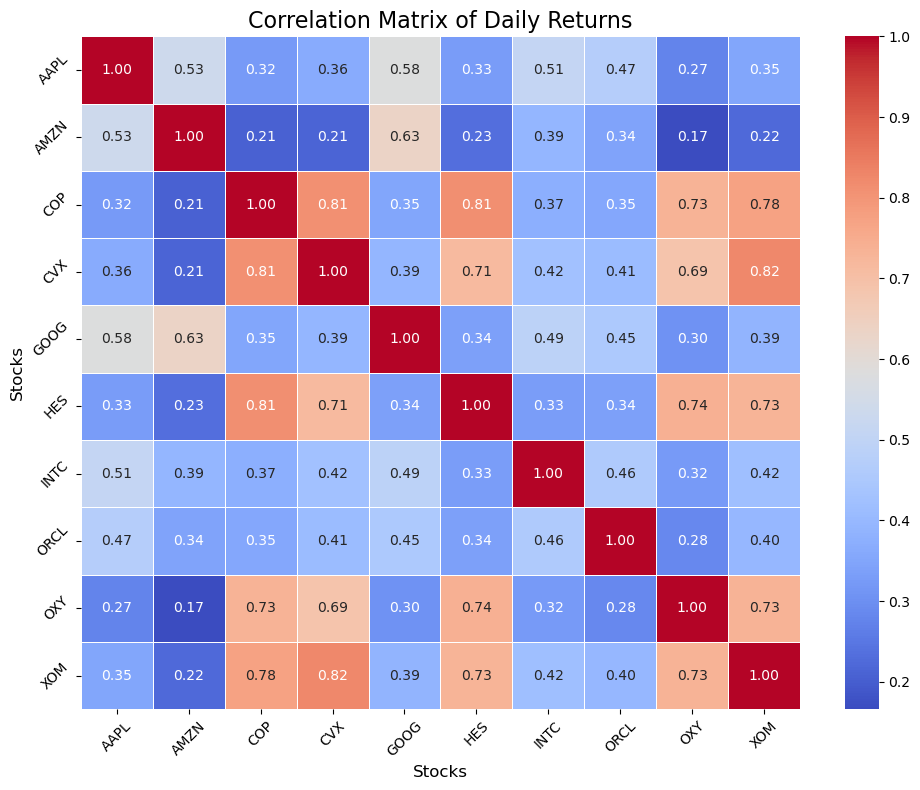

In [12]:
# Calculate daily returns for all stocks
daily_returns = data.pct_change().dropna()

# Compute the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Stocks', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\zxx91\AppData\Local\Temp\ipykernel_23612\2671802459.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_returns = data_new.resample('Q').ffill().pct_change().dropna()
C:\Users\zxx91\AppData\Local\Temp\ipykernel_23612\2671802459.py:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  expected_dates = pd.date_range(start='2020-04-01', end='2021-12-30', freq='Q')
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


      2020-06-30 00:00:00  2020-09-30 00:00:00  2020-12-31 00:00:00  \
AAPL             0.434583             0.269847             0.145756   
AMZN             0.414983             0.141332             0.034363   
COP              0.364286            -0.218467             0.217722   
CVX              0.231438            -0.193097             0.172917   
GOOG             0.215684             0.039608             0.192079   
HES              0.555856            -0.209998             0.289763   
INTC             0.105506            -0.134548            -0.037852   
ORCL             0.143596             0.080152             0.083585   
OXY              0.580311            -0.453005             0.729271   
XOM              0.177772            -0.232335             0.200699   

      2021-03-31 00:00:00  2021-06-30 00:00:00  2021-09-30 00:00:00  Cluster  
AAPL            -0.079433             0.121244             0.033148        0  
AMZN            -0.050001             0.111852            -0

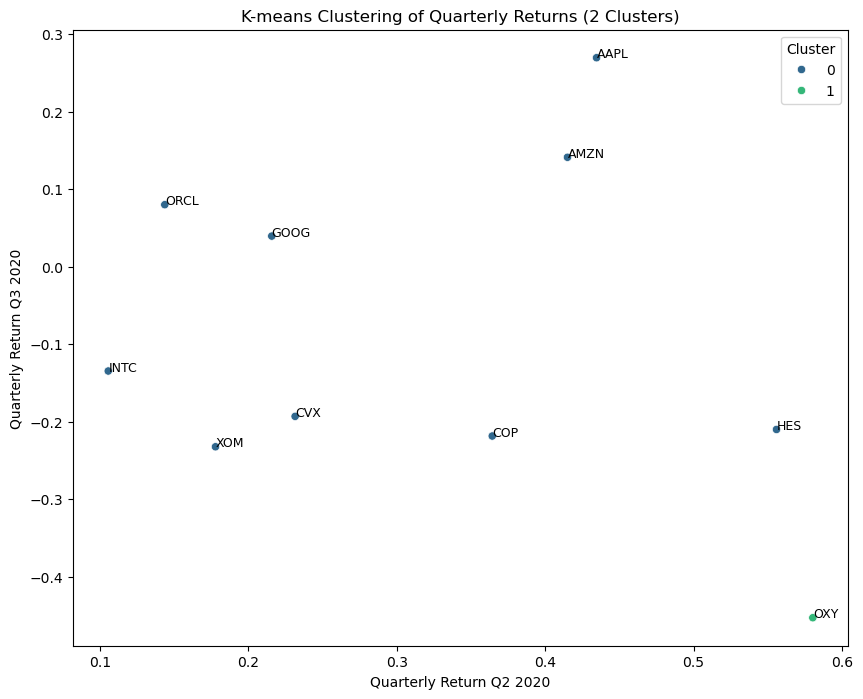

In [13]:
# I keep having errors, I will just read the file again
data_new = pd.read_csv('stock_data.csv')
data_new['Date'] = pd.to_datetime(data_new['Date'])
data_new.set_index('Date', inplace=True)

quarterly_returns = data_new.resample('Q').ffill().pct_change().dropna()

# Filter the quarterly returns for the period Q2 2020 to Q4 2021
quarterly_returns = quarterly_returns.loc['2020-04-01':'2021-12-30']

# Ensure we have exactly 7 quarters: Q2 2020, Q3 2020, Q4 2020, Q1 2021, Q2 2021, Q3 2021, Q4 2021
expected_dates = pd.date_range(start='2020-04-01', end='2021-12-30', freq='Q')
quarterly_returns = quarterly_returns.loc[expected_dates]

# Transpose the quarterly returns DataFrame to have stocks as rows and quarterly returns as columns
quarterly_returns_T = quarterly_returns.T

# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(quarterly_returns_T)
clusters = kmeans.labels_

# Add cluster labels to the DataFrame
quarterly_returns_T['Cluster'] = clusters
print(quarterly_returns_T)

# Plot the clustering result
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=quarterly_returns_T, x=quarterly_returns_T.iloc[:, 0], y=quarterly_returns_T.iloc[:, 1], hue='Cluster', palette='viridis')
for i in range(quarterly_returns_T.shape[0]):
    plt.text(quarterly_returns_T.iloc[i, 0], quarterly_returns_T.iloc[i, 1], quarterly_returns_T.index[i], fontsize=9)

plt.title('K-means Clustering of Quarterly Returns (2 Clusters)')
plt.xlabel('Quarterly Return Q2 2020')
plt.ylabel('Quarterly Return Q3 2020')
plt.legend(title='Cluster')
plt.show()

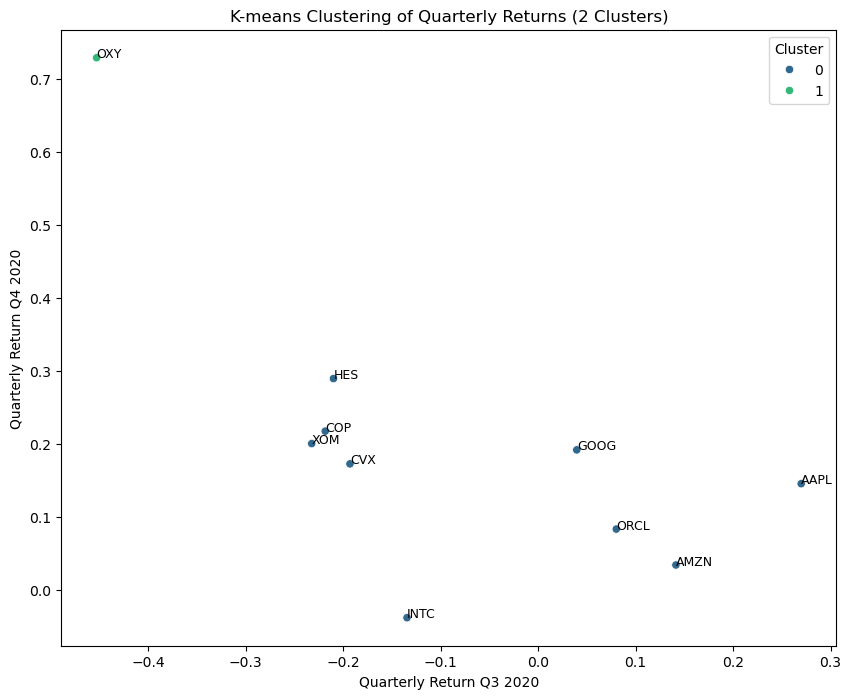

In [14]:
# Plot the clustering result
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=quarterly_returns_T, x=quarterly_returns_T.iloc[:, 1], y=quarterly_returns_T.iloc[:, 2], hue='Cluster', palette='viridis')
for i in range(quarterly_returns_T.shape[0]):
    plt.text(quarterly_returns_T.iloc[i, 1], quarterly_returns_T.iloc[i, 2], quarterly_returns_T.index[i], fontsize=9)

plt.title('K-means Clustering of Quarterly Returns (2 Clusters)')
plt.xlabel('Quarterly Return Q3 2020')
plt.ylabel('Quarterly Return Q4 2020')
plt.legend(title='Cluster')
plt.show()

In [15]:
start_date = '2020-04-01'
end_date = '2021-12-30'
start_prices = data_new.loc[start_date]
end_prices = data_new.loc[end_date]
percentage_changes = ((end_prices - start_prices) / start_prices) * 100
percentage_changes

AAPL    195.878119
AMZN     76.804002
COP     144.024297
CVX      71.280637
GOOG    164.109743
HES     131.269544
INTC     -0.269852
ORCL     80.681593
OXY     169.739292
XOM      61.977093
dtype: float64

In [16]:
# Read the stock data
data_new = pd.read_csv('stock_data.csv')
data_new['Date'] = pd.to_datetime(data_new['Date'])
data_new.set_index('Date', inplace=True)
data_2021 = data_new.loc['2021-01-01':'2021-12-30']
daily_returns = data_2021.pct_change().dropna()

Q = daily_returns.cov()
print("Covariance Matrix (Q):")
print(Q)
n = len(Q)
oxy_index = data_2021.columns.get_loc("OXY")

# Objective function (portfolio variance)
def portfolio_variance(weights):
    return np.dot(weights.T, np.dot(Q, weights))

# Constraints: weights sum to 1, all weights are positive, and weight of OXY is limited
constraints = (
    {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},      # Sum of weights = 1
    {'type': 'ineq', 'fun': lambda weights: weights}
)

# Different initial guess for weights
np.random.seed(42)
initial_guess = np.random.rand(n)
initial_guess /= initial_guess.sum()  # Normalize to ensure they sum to 1

# Optimize
result = minimize(portfolio_variance, initial_guess, method='SLSQP', constraints=constraints)

print("Optimization Result:")
print(result)
# Optimal weights
optimal_weights = result.x

# Display the optimal weights
print("Optimal Portfolio Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"Stock {data_2021.columns[i]}: {weight:.4f}")

Covariance Matrix (Q):
          AAPL      AMZN       COP       CVX      GOOG       HES      INTC  \
AAPL  0.000249  0.000141  0.000019  0.000024  0.000128  0.000024  0.000116   
AMZN  0.000141  0.000230  0.000009  0.000012  0.000133  0.000022  0.000109   
COP   0.000019  0.000009  0.000515  0.000310  0.000074  0.000530  0.000105   
CVX   0.000024  0.000012  0.000310  0.000247  0.000064  0.000335  0.000079   
GOOG  0.000128  0.000133  0.000074  0.000064  0.000223  0.000104  0.000113   
HES   0.000024  0.000022  0.000530  0.000335  0.000104  0.000754  0.000124   
INTC  0.000116  0.000109  0.000105  0.000079  0.000113  0.000124  0.000394   
ORCL  0.000067  0.000015  0.000072  0.000064  0.000037  0.000064  0.000039   
OXY   0.000038  0.000022  0.000692  0.000434  0.000101  0.000800  0.000162   
XOM   0.000017  0.000020  0.000375  0.000264  0.000074  0.000417  0.000097   

          ORCL       OXY       XOM  
AAPL  0.000067  0.000038  0.000017  
AMZN  0.000015  0.000022  0.000020  
COP   0